In [0]:
# Fill in your name using the format below and student ID number
your_name = "CIZIUTE, UGNE LAIMA"
student_id = "1495186"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
# pip install --quiet openml 

In [0]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
sklearn_version = sklearn.__version__
tensorflow_version = tf.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi UGNE LAIMA, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3' # For Google Colab
#base_dir = './'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)

In [0]:
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

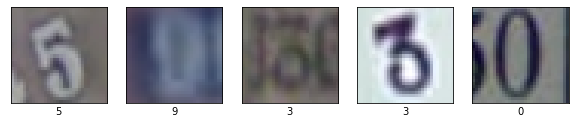

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, model_from_json # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
      # if a json description is available, load config and then weights
      if os.path.isfile(os.path.join(base_dir, name+'.json')):
        json_file = open(os.path.join(base_dir, name+'.json'), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(os.path.join(base_dir, name+extension))
      # else just load the entire model from hdf5 file
      else:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
      shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
      return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
      print("Model larger than 100MB, storing weights only.")
      model.save_weights(path)
      model_json = model.to_json()
      with open(os.path.join(base_dir, name+".json"), "w") as json_file:
          json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            eturn
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 

In [0]:
# Toy usage example
# Remove before submission
def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233453  0.189538  2.233012      0.190974
max  2.247387  0.190891  2.233106      0.190974


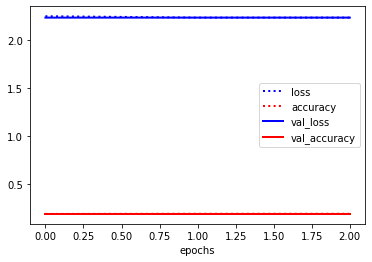

In [0]:
# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233453  0.189538  2.233012      0.190974
max  2.247387  0.190891  2.233106      0.190974


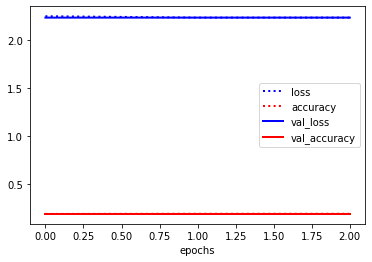

In [0]:
#Toy usage example
#Remove before submission
#With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
def build_model_base_1(model):   
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [0]:
def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    return build_model_base_1(model)

Training the model
Epoch 1/32
1986/1986 [==============================] - 11s 5ms/step - loss: 1.9897 - accuracy: 0.3127 - val_loss: 1.5982 - val_accuracy: 0.4721
Epoch 2/32
1986/1986 [==============================] - 11s 5ms/step - loss: 1.3846 - accuracy: 0.5585 - val_loss: 1.2855 - val_accuracy: 0.5831
Epoch 3/32
1986/1986 [==============================] - 11s 5ms/step - loss: 1.1616 - accuracy: 0.6386 - val_loss: 1.0869 - val_accuracy: 0.6644
Epoch 4/32
1986/1986 [==============================] - 11s 5ms/step - loss: 1.0396 - accuracy: 0.6777 - val_loss: 1.1178 - val_accuracy: 0.6491
Epoch 5/32
1986/1986 [==============================] - 11s 5ms/step - loss: 0.9548 - accuracy: 0.7049 - val_loss: 0.9654 - val_accuracy: 0.7056
Epoch 6/32
1986/1986 [==============================] - 11s 5ms/step - loss: 0.8940 - accuracy: 0.7241 - val_loss: 0.8745 - val_accuracy: 0.7375
Epoch 7/32
1986/1986 [==============================] - 11s 5ms/step - loss: 0.8432 - accuracy: 0.7423 - val_lo

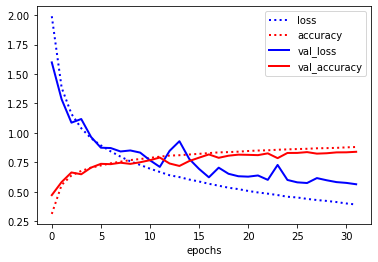

In [0]:
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=32, batch_size=32)
answer_q_1_1 = """
I chose to go for SGD because it performed much better than RMSprop or Adam.
Multiple hidden layers helped to converge to better results, because they generilize better, more than 3 didn't seem to make a positive difference.
It seems like it reaches optimal result at 32 epoch and then starts overfitting,
but if we added more epochs the val_accuracy could still improve, since the val_loss is still flunctuating.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

In [0]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    return build_model_base_1(model)

Training the model
Epoch 1/30
1986/1986 [==============================] - 9s 5ms/step - loss: 2.1240 - accuracy: 0.2549 - val_loss: 1.8791 - val_accuracy: 0.4004
Epoch 2/30
1986/1986 [==============================] - 9s 5ms/step - loss: 1.5680 - accuracy: 0.4937 - val_loss: 1.4310 - val_accuracy: 0.5275
Epoch 3/30
1986/1986 [==============================] - 9s 5ms/step - loss: 1.2506 - accuracy: 0.6103 - val_loss: 1.1505 - val_accuracy: 0.6459
Epoch 4/30
1986/1986 [==============================] - 9s 5ms/step - loss: 1.1012 - accuracy: 0.6591 - val_loss: 1.1598 - val_accuracy: 0.6331
Epoch 5/30
1986/1986 [==============================] - 9s 5ms/step - loss: 1.0044 - accuracy: 0.6903 - val_loss: 0.9476 - val_accuracy: 0.7125
Epoch 6/30
1986/1986 [==============================] - 9s 5ms/step - loss: 0.9324 - accuracy: 0.7130 - val_loss: 0.9573 - val_accuracy: 0.7051
Epoch 7/30
1986/1986 [==============================] - 9s 5ms/step - loss: 0.8771 - accuracy: 0.7314 - val_loss: 0.9

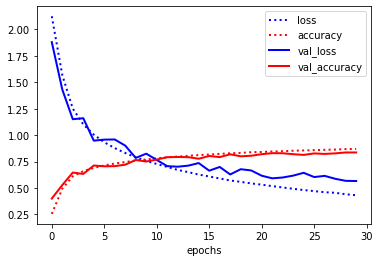

In [0]:
# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=32)
answer_q_1_2 = """
The model's val_acuracy as well as val_loss stays pretty much the same since color doesn't change the digit
but it does compute faser, because we have less input nodes, so less parameters to learn.
The sweet spot of the model is on epoch 30, afterwards it starts overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [0]:
from tensorflow.keras import regularizers 
from tensorflow.keras import optimizers

In [0]:
def build_model_1_3():
    model = models.Sequential()
    sgd = optimizers.SGD(lr=0.05, decay=1e-5)
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training the model
Epoch 1/26
1986/1986 [==============================] - 9s 5ms/step - loss: 1.9704 - accuracy: 0.3814 - val_loss: 1.5667 - val_accuracy: 0.5403
Epoch 2/26
1986/1986 [==============================] - 10s 5ms/step - loss: 1.3595 - accuracy: 0.6076 - val_loss: 1.1385 - val_accuracy: 0.6879
Epoch 3/26
1986/1986 [==============================] - 9s 5ms/step - loss: 1.1268 - accuracy: 0.6776 - val_loss: 1.1492 - val_accuracy: 0.6707
Epoch 4/26
1986/1986 [==============================] - 9s 5ms/step - loss: 1.0011 - accuracy: 0.7132 - val_loss: 1.0407 - val_accuracy: 0.7006
Epoch 5/26
1986/1986 [==============================] - 9s 5ms/step - loss: 0.9115 - accuracy: 0.7385 - val_loss: 0.9357 - val_accuracy: 0.7325
Epoch 6/26
1986/1986 [==============================] - 9s 5ms/step - loss: 0.8444 - accuracy: 0.7563 - val_loss: 0.7976 - val_accuracy: 0.7756
Epoch 7/26
1986/1986 [==============================] - 9s 5ms/step - loss: 0.7927 - accuracy: 0.7693 - val_loss: 0.

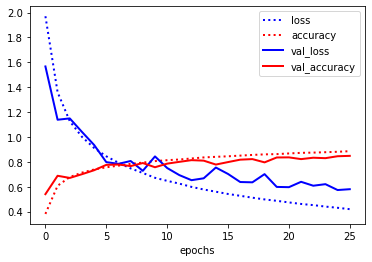

In [0]:
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=26, batch_size=32)
answer_q_1_3 = """
Dropout and L1 regularizer decrease accuracy.
It achieves the best accuracy with l2 regularizer in the last hidden layer, more regulirizers don't help.
Higher learning rate helps to converge faster to better results and decay helps to regularize the learning rate so that in the later epochs we wouldn't miss the sweet spot.
The best results are reached at epoch 26, but if we added more epochs the val_accuracy could still improve, since the val_loss is still flunctuating..
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

In [0]:
def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(48, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training the model
Epoch 1/26
1986/1986 [==============================] - 21s 11ms/step - loss: 0.8404 - accuracy: 0.7289 - val_loss: 0.3709 - val_accuracy: 0.8841
Epoch 2/26
1986/1986 [==============================] - 21s 11ms/step - loss: 0.3740 - accuracy: 0.8880 - val_loss: 0.2934 - val_accuracy: 0.9093
Epoch 3/26
1986/1986 [==============================] - 21s 11ms/step - loss: 0.3095 - accuracy: 0.9093 - val_loss: 0.4030 - val_accuracy: 0.8765
Epoch 4/26
1986/1986 [==============================] - 21s 10ms/step - loss: 0.2769 - accuracy: 0.9205 - val_loss: 0.2527 - val_accuracy: 0.9267
Epoch 5/26
1986/1986 [==============================] - 21s 10ms/step - loss: 0.2493 - accuracy: 0.9273 - val_loss: 0.2568 - val_accuracy: 0.9238
Epoch 6/26
1986/1986 [==============================] - 21s 10ms/step - loss: 0.2335 - accuracy: 0.9336 - val_loss: 0.2147 - val_accuracy: 0.9346
Epoch 7/26
1986/1986 [==============================] - 21s 10ms/step - loss: 0.2193 - accuracy: 0.9382 -

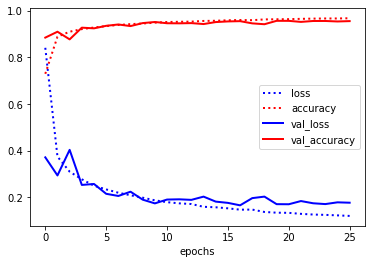

In [0]:
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=26, batch_size=32)
answer_q_2_1 = """
Using multiple convolutional hidden layers allows for better accuracy and smaller loss, because multiple different filters could be recognized.
MaxPooling allows to summarize the most activated features.
BatchNormalization increases accuracy and allows for faster converge, because it normalizes each batch by both mean and variance reference.
Dropout helps to generilize better, less overfitting, nodes are forced to learn new patterns.
Padding helps to not lose information while applying convolutions.
After trying out multiple combinations of Dropout, BatchNormalization and Conv2D layers this seemed to produce the best results.
The best accuracy is ahieved around epoch 26, at that point the model stabilizes and afterwards it starts overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
def augment_data(preprocessed_split):
    train_datagen = ImageDataGenerator(zoom_range=0.3)
    augmented_train = train_datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=32)
    return augmented_train, preprocessed_split[1], preprocessed_split[3]

Training the model
Epoch 1/55
1985/1985 [==============================] - 25s 13ms/step - loss: 1.0320 - accuracy: 0.7103 - val_loss: 0.4222 - val_accuracy: 0.8896
Epoch 2/55
1985/1985 [==============================] - 25s 13ms/step - loss: 0.4782 - accuracy: 0.8704 - val_loss: 0.4336 - val_accuracy: 0.8769
Epoch 3/55
1985/1985 [==============================] - 25s 13ms/step - loss: 0.4060 - accuracy: 0.8913 - val_loss: 0.2908 - val_accuracy: 0.9250
Epoch 4/55
1985/1985 [==============================] - 25s 13ms/step - loss: 0.3704 - accuracy: 0.9018 - val_loss: 0.2496 - val_accuracy: 0.9382
Epoch 5/55
1985/1985 [==============================] - 25s 13ms/step - loss: 0.3466 - accuracy: 0.9099 - val_loss: 0.2963 - val_accuracy: 0.9219
Epoch 6/55
1985/1985 [==============================] - 25s 12ms/step - loss: 0.3274 - accuracy: 0.9156 - val_loss: 0.2727 - val_accuracy: 0.9291
Epoch 7/55
1985/1985 [==============================] - 25s 13ms/step - loss: 0.3113 - accuracy: 0.9205 -

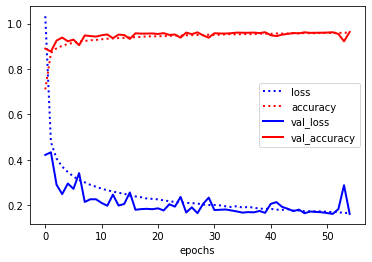

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
augmented_split = augment_data(preprocessed_split)
steps = int(preprocessed_split[0].shape[0] / 32)
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, epochs=55, batch_size=32, steps_per_epoch=steps, generator=True)
answer_q_2_2 = """
Zoom increases val_accuracy because the digit in the image is always centered which means that zoom can help to focus even better on the digit.
Augmentation allowed the model to learn more from the data at the cost of a longer training time.
The best results are achieved on epoch 55, later starts overfitting.
Rotation, shift and sheer didn't have any significant impact when applied in small doses.
Flipping lowered the accuracy because a flipped number can become a totally different number.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
def plot_confusion_matrix_for(y_test, y_pred):
    plt.rcParams['figure.dpi'] = 100
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
    ax.set_xticklabels(labels), ax.set_yticklabels(labels)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

In [0]:
def plot_misclassifications_for(X_test_grey, y_test, y_pred, misclassified_samples, test_class):
  fig, axes = plt.subplots(4, 6,  figsize=(15, 7))
  n = 0
  for sample in misclassified_samples:
      if (np.argmax(y_test[sample])+1)%10 == test_class:
        row = int(n/6)
        column = n % 6
        axes[row, column].imshow(X_test_grey[sample].reshape(32, 32)/255, cmap='gray')
        axes[row, column].set_xlabel(f'Predicted: {(np.argmax(y_pred[sample])+1)%10}, Actual : {(np.argmax(y_test[sample])+1)%10}')
        axes[row, column].set_xticks(()), axes[row, column].set_yticks(())
        n += 1
        if n == 24:
          break

  plt.show();

In [0]:
model = load_model_from_file(base_dir, "model_2_2")
X_test_grey = rgb2gray(X_test)
y_pred = model.predict(X_test_grey)

test_accuracy_3_1 = accuracy_score(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))

def plot_confusion_matrix():
    plot_confusion_matrix_for(y_test, y_pred)

misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

def plot_misclassifications():
    plot_misclassifications_for(X_test_grey, y_test, y_pred, misclassified_samples, 1)

answer_q_3_1 = """
From the confusion matrix we can see that that nr. 7 is often confused with nr. 1, which makes sense as these numbers are very similar, but the opposite is a more rare case.
Nr. 5 is often confused with nr. 3, which is interesting as these numbers are quite different.
Nr. 1 seems to be often confused with many other numbers.
As nr. 1 is often missclassified we analyze more in depth what is happening.
We noticed that sometimes the true labeled attached to the picture is wrong.
Also, very often the picture is centered not around the number in the label but around a different number, while the nr. from the label is on a side.
Sometimes the image quality is so low that it's hard to tell with a plain eye what number is supposed to be there.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 747 characters long


0.9626850639540739


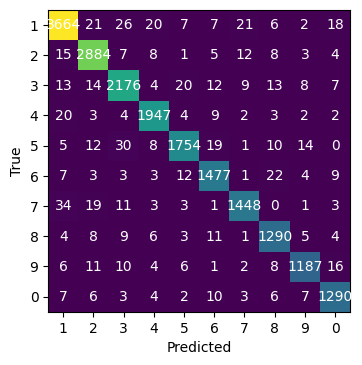

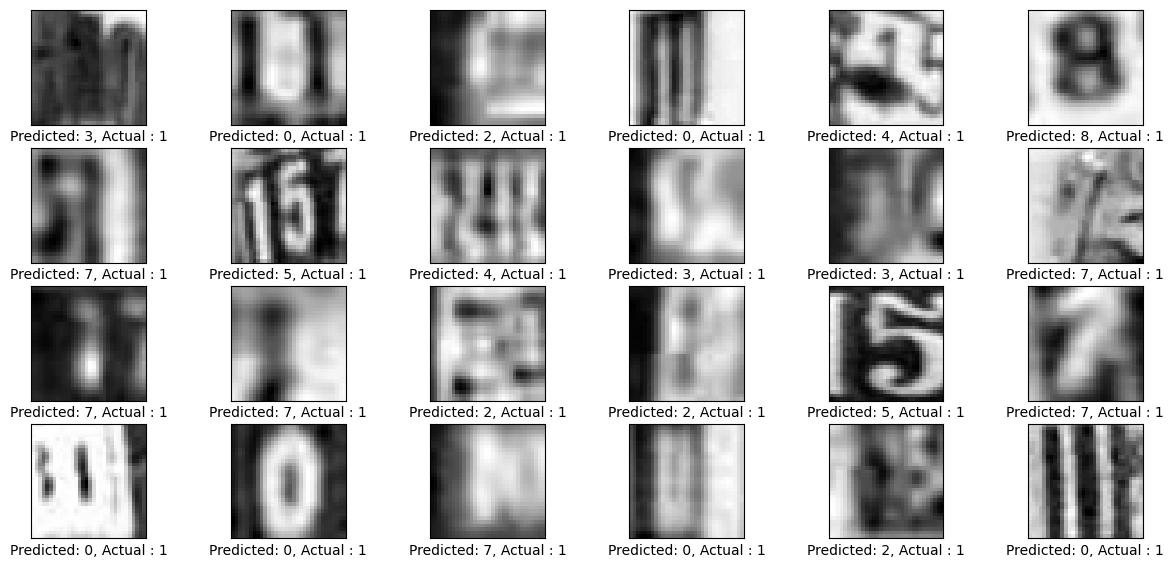

In [0]:
# print(test_accuracy_3_1)
# plot_confusion_matrix()
# plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [0]:
def plot_activations():

    X_test_grey = rgb2gray(X_test)
    img_tensor = X_test_grey[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    model = load_model_from_file(base_dir, "model_2_2")

    pred = model.predict(img_tensor)
    pred_label = (np.argmax(pred)+1)%10
    print(f'Prediction of the first example: {pred_label}')

    # Extracts the outputs of the top 8 layers:
    layer_outputs = [layer.output for layer in model.layers]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # This will return a list of Numpy arrays:
    # one array per layer activation
    activations = activation_model.predict(img_tensor)


    images_per_row = 16

    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)

    layer_ids = [0, 2, 6, 8]
    conv_2d_layer_names = [layer_names[i] for i in layer_ids]
    conv_2d_activations = [activations[i] for i in layer_ids]

    # start = layer_index
    # end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation, layer_index in zip(conv_2d_layer_names, conv_2d_activations, layer_ids):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

In [0]:
answer_q_3_2 = """
In the first conv. layer only some filters get activated recognizing the shape of a nr. 8.
The picture did not have certain data to activate other filters.
In layer 3 the filters become more abstract enhancing different parts of the number.
Afterwards the filters focus on very specific parts of the picture, but the nr. 8 can still be recognized where the filter focuses on the number's contour.
After MaxPooling has been applied twice the conv. layers produce filters that become unrecognizable.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 499 characters long


Prediction of the first example: 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


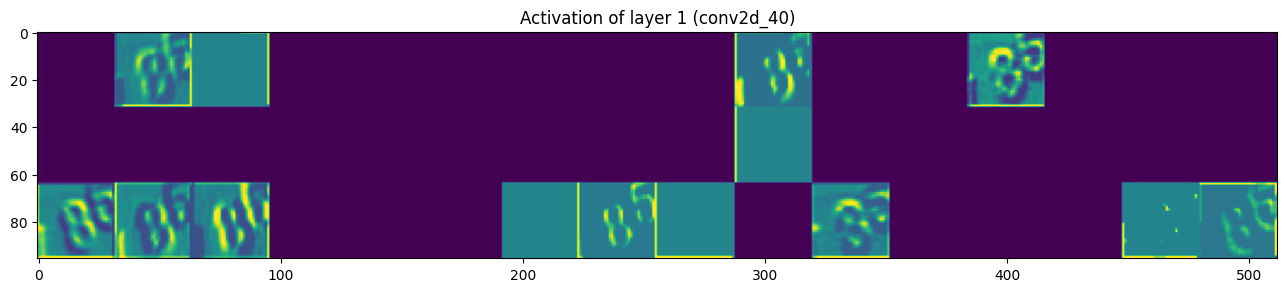

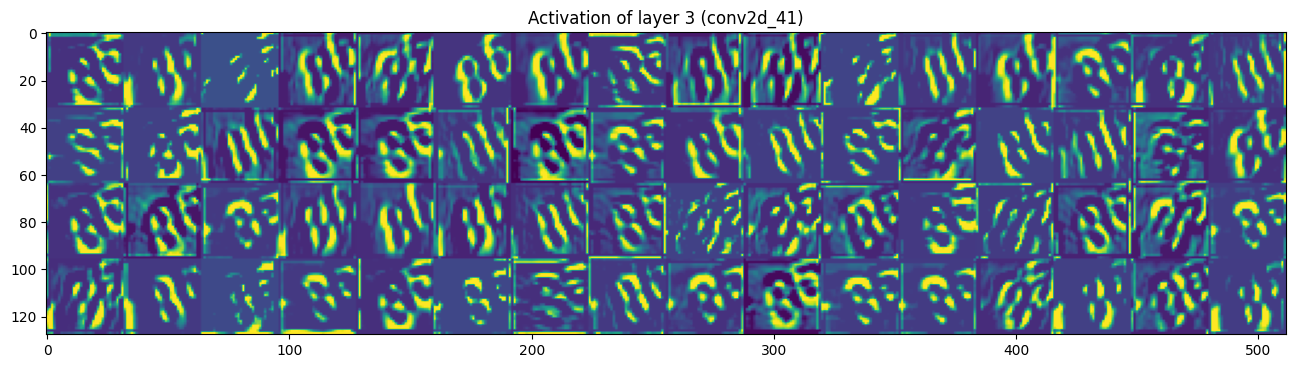

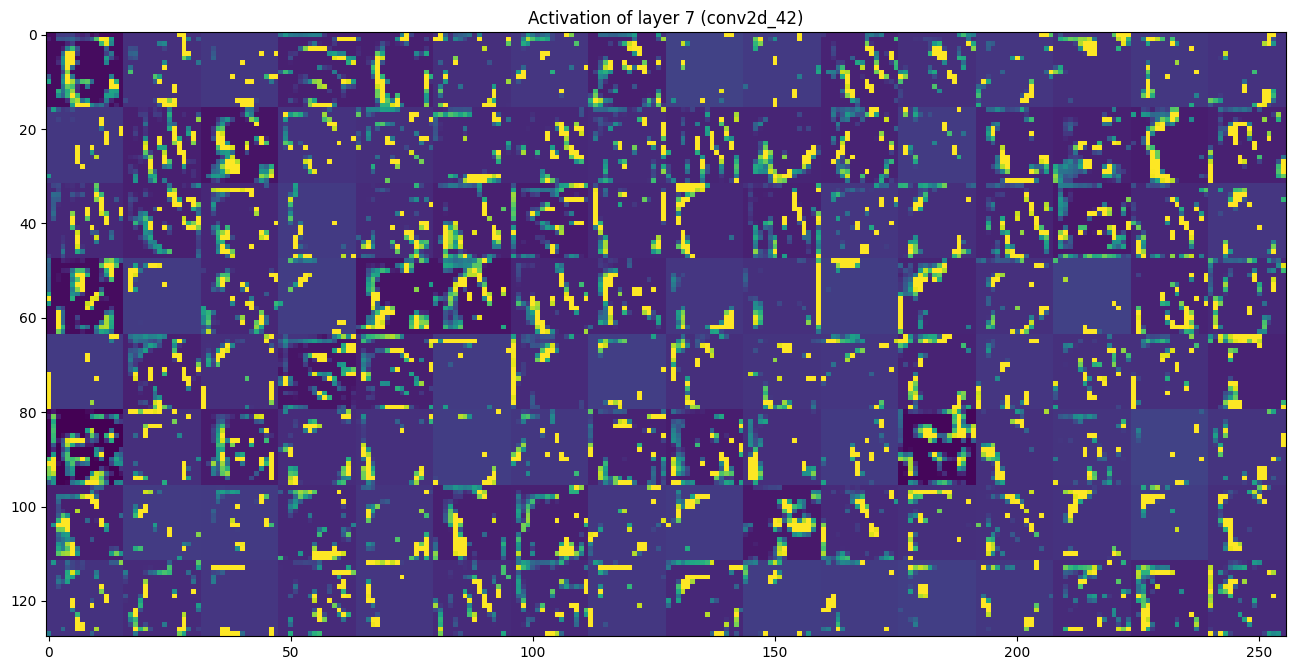

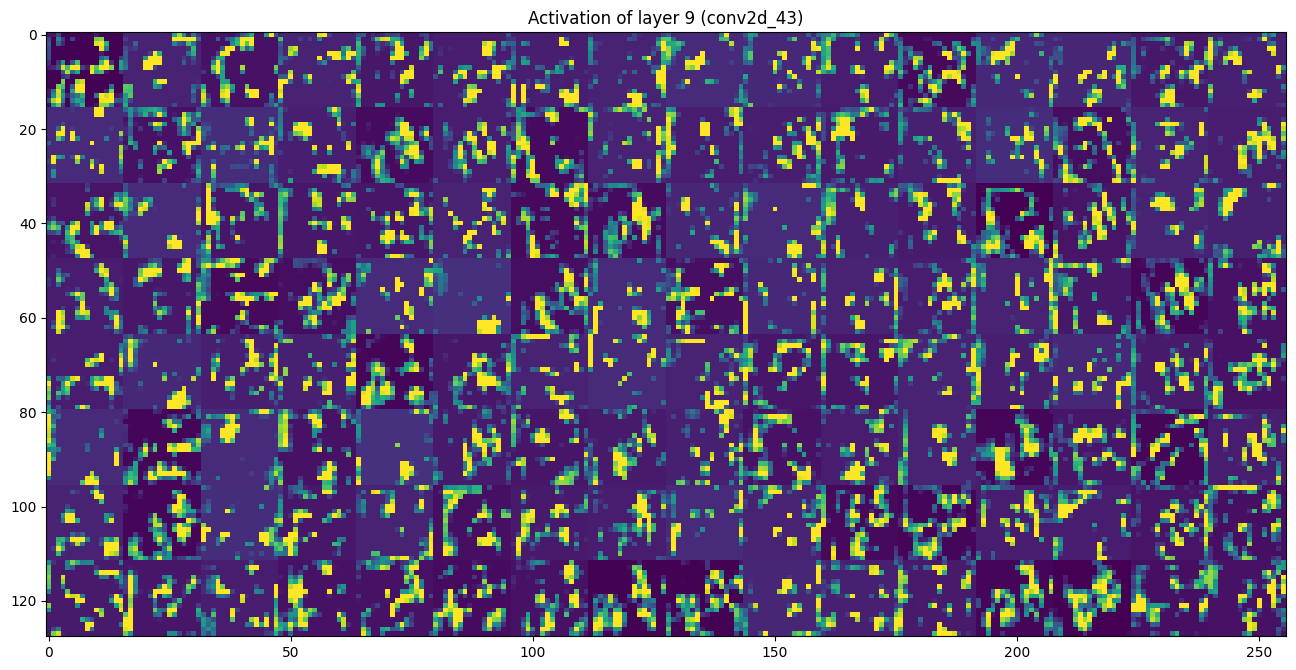

In [0]:
# plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [0]:
from tensorflow.keras import backend as K
import cv2

In [0]:
def plot_superimposed_activation_map(img, heatmap):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # 0.0015 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.0015 + img

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
    ax1.imshow(img)
    ax2.imshow(heatmap)
    ax3.matshow(superimposed_img)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax1.set_xlabel('Original image')
    ax2.set_xlabel('Class activation map')
    ax3.set_xlabel('Superimposed \n class activation map');


def get_activation_map(img_tensor, model, last_conv_layer_name):

    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(img_tensor)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = heatmap.reshape((4, 4))

    return heatmap

In [0]:
def plot_3_3():
    X_test_grey = rgb2gray(X_test)
    img_tensor = X_test_grey[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    model = load_model_from_file(base_dir, "model_2_2")
    last_conv_layer_name  = 'conv2d_47'
    heatmap = get_activation_map(img_tensor, model, last_conv_layer_name)
    plot_superimposed_activation_map(X_test[0], heatmap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


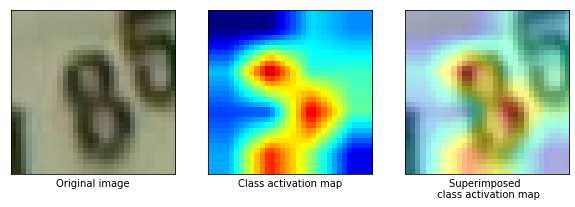

In [0]:
# plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [0]:
from tensorflow.keras.applications import VGG16

In [0]:
def build_model_4_1():
  conv_base = VGG16(weights='imagenet', 
                include_top=False,
                input_shape=(32, 32, 3))
  conv_base.trainable = True
  set_trainable = False
  for layer in conv_base.layers:
      if layer.name == 'block4_conv1':
          set_trainable = True
      if set_trainable:
          layer.trainable = True
          layer.padding = 'same'
      else:
          layer.trainable = False
    
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

Training the model
Epoch 1/4
993/993 [==============================] - 63s 64ms/step - loss: 1.1015 - accuracy: 0.6756 - val_loss: 0.5507 - val_accuracy: 0.8515
Epoch 2/4
993/993 [==============================] - 63s 63ms/step - loss: 0.5437 - accuracy: 0.8572 - val_loss: 0.4750 - val_accuracy: 0.8666
Epoch 3/4
993/993 [==============================] - 63s 64ms/step - loss: 0.4641 - accuracy: 0.8803 - val_loss: 0.4023 - val_accuracy: 0.8960
Epoch 4/4
993/993 [==============================] - 63s 64ms/step - loss: 0.4135 - accuracy: 0.8908 - val_loss: 0.4097 - val_accuracy: 0.8909
Saving to file
Model larger than 100MB, storing weights only.
Model stored in /content/drive/My Drive/assignment-3
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_

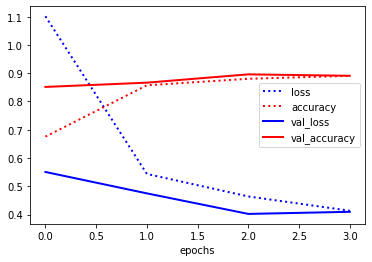

In [0]:
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=4, batch_size=64)
answer_q_4_1 = """
The base VGG16 model performs quite badly.
The more layers get unfrozen, the better results are produced, but if all layers get unfrozen then there is no point of haivng a pretrained model.
Time and accuracy wise I chose to unfreeze 2 blocks of conv. layers and added padding to them to prevent loss of some information.
Small learning rate with a decay allowed me to steadily but fast achieve good results.
We are able to stop the training at 4th epoch.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
def get_label(a):
  return (np.argmax(a)+1)%10

In [0]:
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, "model_4_1")
  conv_layer = model.get_layer('vgg16')

  store_embedding(np.squeeze(conv_layer.predict(X_train)), 'train')
  store_embedding(np.squeeze(conv_layer.predict(X_test)), 'test')


def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  pca = PCA(n_components=12)
  svc = SVC(C=40, gamma=0.0003)
  return Pipeline(steps=[('pca', pca), ('svc', svc)])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  predictions = pipeline.predict(X_test)
  return accuracy_score(y_test, predictions)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  try:
    train_embedding = load_embedding('train')
    test_embedding = load_embedding('test')
  except Exception:
    store_embeddings()
    train_embedding = load_embedding('train')
    test_embedding = load_embedding('test')

  pipeline = generate_pipeline()
  y_train_labels = np.apply_along_axis(get_label, 1, y_train)
  y_test_labels = np.apply_along_axis(get_label, 1, y_test)
  return evaluate_pipeline(pipeline, train_embedding, y_train_labels, test_embedding, y_test_labels)

answer_q_4_2 = """
Looking at the cumulative explained_variance_ratio sum provided by PCA on validation set I picked 12 components as they explain 99% of the variance.
Using GridSearch I determined that SVC with C=40 and gamma=0.0003 provides the best accuracy on the validation set,
so subsequently I applied it on the train and test sets and the accuracy is as good ~91%.
Sadly, it didn't beat my best model which has around 96% accuracy, but considering that it is a partially pretrained model, it's quite good.
"""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=40, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.0003, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
Answer is 312 characters long
